In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

In [76]:
!ls

Challenge6.ipynb            house-votes-84.data
haberman.data               plot_precision_recall.ipynb


In [77]:
df = pd.read_csv('house-votes-84.data',header = None )

In [78]:
df.replace('y', 1, inplace = True)
df.replace('n', 0, inplace = True)
df.replace('?', np.nan, inplace=True)
df.fillna(df.mean(),inplace=True)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


In [79]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

## Exercise 6.1 
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [80]:
modelsToUse = [LogisticRegression, GaussianNB, SVC, DecisionTreeClassifier,RandomForestClassifier, KNeighborsClassifier]


In [81]:
for model in modelsToUse:
    clf1 = model()
    fit1 = clf1.fit(X_train,y_train)
    # SVC(priors=None)
    predict = fit1.predict(X_test)
    print str(model), ":", accuracy_score(y_test, predict)
    print str(model), ":", precision_score(y_test, predict, pos_label = 'democrat')
    print str(model), ":", recall_score(y_test, predict, pos_label = 'democrat')
    print str(model), ":", f1_score(y_test, predict, pos_label = 'democrat')
    print '\n'


<class 'sklearn.linear_model.logistic.LogisticRegression'> : 0.93893129771
<class 'sklearn.linear_model.logistic.LogisticRegression'> : 0.925925925926
<class 'sklearn.linear_model.logistic.LogisticRegression'> : 0.974025974026
<class 'sklearn.linear_model.logistic.LogisticRegression'> : 0.949367088608


<class 'sklearn.naive_bayes.GaussianNB'> : 0.93893129771
<class 'sklearn.naive_bayes.GaussianNB'> : 0.915662650602
<class 'sklearn.naive_bayes.GaussianNB'> : 0.987012987013
<class 'sklearn.naive_bayes.GaussianNB'> : 0.95


<class 'sklearn.svm.classes.SVC'> : 0.954198473282
<class 'sklearn.svm.classes.SVC'> : 0.949367088608
<class 'sklearn.svm.classes.SVC'> : 0.974025974026
<class 'sklearn.svm.classes.SVC'> : 0.961538461538


<class 'sklearn.tree.tree.DecisionTreeClassifier'> : 0.93893129771
<class 'sklearn.tree.tree.DecisionTreeClassifier'> : 0.936708860759
<class 'sklearn.tree.tree.DecisionTreeClassifier'> : 0.961038961039
<class 'sklearn.tree.tree.DecisionTreeClassifier'> : 0.94871794

## Exercise 2
For each, draw the Precision-Recall curve, ROC curve and calculate the AUC.

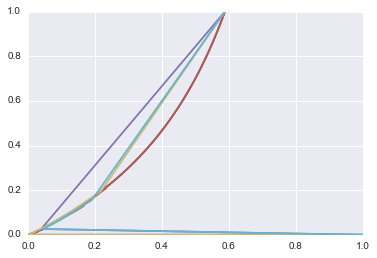

In [82]:
modelList = [LogisticRegression(), SVC(probability = True), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
# predict.shape
for model in modelList:
    prob = model.fit(X_train, y_train).predict_proba(X_test)
#     print prob
    precision, recall, thresholds = precision_recall_curve(y_test, prob[:,1], pos_label = 'democrat')
    plt.plot(precision, recall)


LogisticRegression AUC 0.0122655122655
SVC AUC 0.00505050505051
GaussianNB AUC 0.015873015873
DecisionTreeClassifier AUC 0.0750360750361
RandomForestClassifier AUC 0.00817700817701
KNeighborsClassifier AUC 0.0515873015873


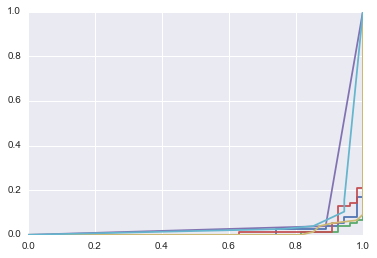

In [89]:
modelList = [LogisticRegression(), SVC(probability = True), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier(), KNeighborsClassifier()]
# predict.shape
for model in modelList:
    prob = model.fit(X_train, y_train).predict_proba(X_test)
#     print prob

    
    fpr, tpr, thresholds = roc_curve(y_test, prob[:,1], pos_label = 'democrat')
    plt.plot(fpr, tpr)
    print model.__str__().split('(')[0], "AUC", auc(fpr, tpr)
#     plt.legend([model], loc = 'lower left');

## Exercise 3

Draw the Precision-Recall curve, ROC curve (and calculate AUC) for the logistic regression classifier from Exercise 5.12 in 05-Classification Challenge that uses Haberman Survival Dataset

In [51]:
survivaldf = pd.read_csv('haberman.data', header = None)
survivaldf.columns = ['Age','YearOfOperation','Nodes','Survival']

In [52]:
survivaldf.head()

,Age,YearOfOperation,Nodes,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [58]:
X = survivaldf.iloc[:,:3]
y = survivaldf.iloc[:,3]

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

In [63]:
logistic = LogisticRegression()
logisticFit = logistic.fit(X_train, y_train)

In [66]:
precision, recall, threshold = precision_recall_curve(y_test, logisticFit.predict_proba(X_test)[:,0], pos_label = 1)
fpr, tpr, threshold2 = roc_curve(y_test, logisticFit.predict_proba(X_test)[:,0], pos_label = 1)

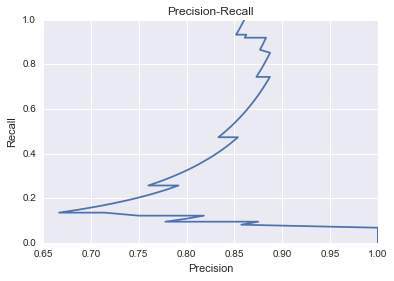

In [71]:
plt.plot(precision, recall)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title('Precision-Recall')

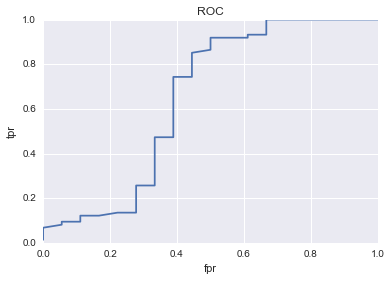

In [69]:
plt.plot(fpr, tpr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('ROC')